In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import numpy as np
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
con = sqlite3.connect('./clean_final') # this is cleaned dataset
final = pd.read_sql_query("""
SELECT *
FROM reviews
""", con)

In [18]:
def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned

In [19]:
final.head()

,level_0,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_not_included,Text_not_excluded,clean_review,stemmed_review,average_Word2Vec,tfidf_Word2Vec
0,10618,16395,17899,B001EO653M,A21BMUL4UEY53N,chocoholic,0,0,positive,1294444800,Can't get much better than this.,This awesome mix is not your usual Hot Chocola...,b'awesom mix not usual hot chocol look not buy...,b'awesom mix usual hot chocol look buy product...,this awesome mix not your usual hot chocolate ...,b'this awesom mix not your usual hot chocol th...,b'\xfa\x82\xbe\xf4)O\xe0\xbf\xd0\x17t\xdeO\x94...,b'\xb6\xbdl\xac~\xb7\xdd\xbfXI\xf0;\x04&\xa4?\...
1,5581,23132,25312,B000MDCDOG,A1E1AX7DE5S18X,Nirac,0,0,positive,1288224000,Wonderful...Too Expensive Here,"I've never been a fan of tuna, however, after ...",b'ive never fan tuna howev tri sundri tomato b...,b'ive never fan tuna howev tri sundri tomato b...,ive never been fan tuna however after trying t...,b'ive never been fan tuna howev after tri this...,b'\xd1E\x17\x914\x9f\xdd\xbft\xd1E\x85\xd8\xc5...,b'\xfc\xd1jVr)\xda\xbfK]9*0\x89\x95?\x06$\xc2[...
2,10460,17867,19477,B001EO5PWO,A2YAHDOYQK3JJJ,"Roger D. Lauzon ""coaterfreak""",0,0,positive,1285459200,great spice,these are the same spices thare used on the fo...,b'spice thare use food network alway fresh gre...,b'spice thare use food network alway fresh gre...,these are the same spices thare used the food ...,b'these are the same spice thare use the food ...,b'\xdb\xb6m\xfb\x9f\xa5\xe3\xbf%I\x92$/G\xa1?I...,"b""\xf75\xd4\x9b\xf1m\xe3\xbfo\xf0m\xa5\xb0l\xa..."
3,6356,8644,9475,B000UBDKII,A2VRSADIZLOAU3,"Anne Cummings ""annebanana""",0,0,positive,1278115200,YUM,Great coffee. We mix it with Godiva chocolate...,b'great coffe mix godiva chocol coffe regular ...,b'great coffe mix godiva chocol coffe regular ...,great coffee mix with godiva chocolate coffee ...,b'great coffe mix with godiva chocol coffe reg...,"b""\x1c\xc7q\x8c\xa0\xa1\xe2\xbf\xe48\x8e\xd3\x...",b'\xc8\x16\x8f\xab\xc6K\xe2\xbfB\xb2d\x8a\xe2\...
4,18558,15674,17140,B00408F3XC,A1RWB3QBIPL85Y,"S. Largent ""Digital XTC""",0,0,positive,1329264000,happy valentines day,"delivered on time for v day, packaged very wel...",b'deliv time day packag well instruct fresh be...,b'deliv time day packag well instruct fresh be...,delivered time for day packaged very well with...,b'deliv time for day packag veri well with ins...,b'\xab\xaa\xaaz\xcc\xb6\xe0\xbf\xab\xaa\xea\x8...,b'\x00\x8c0\xb7\x1d\xbb\xde\xbfE\\\x11VGM\x95?...


In [20]:
from nltk.corpus import stopwords

### From previous exercise we know that excluding 'not' from set of stopwords improves separation between positive and negative reviews. At least for TF-IDF

In [21]:
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

In [22]:
# Stem 'clean_review'

s=None

stemmed_review=[]
for sent in final['clean_review'].values:
    
    stems=[]
    for w in sent.split():    
                
        stems.append(sno.stem(w).encode('utf8'))
    
    s=b' '.join(stems)
    
    
    stemmed_review.append(s.decode())

In [23]:

final['stemmed_review']=stemmed_review

In [25]:
final['stemmed_review'].head()

0    this awesom mix not your usual hot chocol that...
1    ive never been fan tuna howev after tri this s...
2    these are the same spice thare use the food ne...
3    great coffe mix with godiva chocol coffe regul...
4    deliv time for day packag veri well with instr...
Name: stemmed_review, dtype: object

In [30]:
final['level_0'].head()

0    10618
1     5581
2    10460
3     6356
4    18558
Name: level_0, dtype: int64

In [46]:
db=sqlite3.connect('./clean_final.sqlite')
cur=db.cursor()
db.text_factory=str
final.to_sql('reviews', db, if_exists='replace', index=False)

In [15]:
# Randomly sample 2500 points
import random
final=final.iloc[random.sample(range(len(final)), 2500)]

In [34]:
time_based_split=final.sort_values('Time')

In [37]:
time_based_split.Text_not_included=[s.decode() for s in time_based_split.Text_not_included.values]

In [39]:
time_based_split.Text_not_excluded=[s.decode() for s in time_based_split.Text_not_excluded.values]

In [42]:
time_based_split=time_based_split.drop('level_0', axis=1)

In [45]:
time_based_split.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Text_not_included,Text_not_excluded,clean_review,stemmed_review,average_Word2Vec,tfidf_Word2Vec
1866,10992,11991,B0000T15M8,A2928LJN5IISB4,chatchi,5,5,positive,1067990400,The fruits of my labor,When chatchi's favorite afternoon treat became...,chatchi favorit afternoon treat becam mysteri ...,chatchi favorit afternoon treat becam mysteri ...,when chatchis favorite afternoon treat became ...,when chatchi favorit afternoon treat becam mys...,b'333v==\xdb\xbf\xef\xee\xee\xf9\xf8\xc4\x9a?\...,"b'/\x0b\xfb+\r\xd4\xce\xbfk"";a1\x1c\x95?Uqc\xd..."
1793,6790,7432,B0001E1IME,A2IKCTD1I73PLW,Adeba,2,8,positive,1083456000,amazon monopoly/ripoff,love the snack. wanted to buy a bunch.<p>ship...,love snack want buy bunch ship amazon price sn...,love snack want buy bunch ship amazon price sn...,love the snack wanted buy bunch shipping amazo...,love the snack want buy bunch ship amazon more...,b'\x9a\x99\x99M\x1e\n\xe2\xbf\xa8\x83:t\xec\x8...,b'^\x15\xf3\xe1X\x08\xe2\xbf\x11\xe8W\x13\xa9\...
330,1112,1206,B005O072PC,A3BD5B8Y8MY25X,"J. L. K. ""special_k""",13,14,positive,1088467200,The best twice baked potatoes you'll ever have!,Perfect year round with just about any meat di...,perfect year round meat dish omaha steak twice...,perfect year round meat dish omaha steak twice...,perfect year round with just about any meat di...,perfect year round with just about ani meat di...,b'F\x17]\xec\x87G\xdb\xbf]t\x11\xd7\xd3\x87\x9...,b'w^\x1f\xedP\x16\xd9\xbf\xe3\xef\xd6\xe0\x96\...
365,14096,15390,B0002IMRTC,ALKOHQH542KO,G. Elliott,5,15,positive,1090281600,Peet says it's good.,So it must be good. He never lies to me. Eve...,must good never lie even skizip like drink str...,must good never lie even skizip like drink str...,must good never lies even skizip likes and all...,must good never lie even skizip like and all d...,b'333\xfbR\xa9\xdf\xbf\xcd\xcc\xcc\x92\xbc\xbb...,b'\x1fU\x91\x9d\xda{\xdc\xbf\xcc\xc1\xba\x88\x...
659,5886,6374,B000084EKB,A1Z54EM24Y40LL,c2,0,0,positive,1091059200,Great food!,This version is ground. NOt my current cat's ...,version ground not current cat favorit version...,version ground current cat favorit version rea...,this version ground not current cats favorite ...,this version ground not current cat favorit ve...,b'\xc9g\xddl\x90\xf4\xdf\xbf\xc2\x14\xf9\x04\x...,b'3\xc2\t\x1c\xa8\xf6\xdd\xbfc9\xf4\x95\xe1\r\...


In [ ]:
db=sqlite3.connect('./clean_final.sqlite')
cur=db.cursor()
db.text_factory=str
time_based_split.to_sql('reviews', db, if_exists='replace', index=False)

## TF-IDF vector

In [193]:
tf_idf = TfidfVectorizer(ngram_range=(1,2))
bigrams_tf=tf_idf.fit_transform(time_based_split['Text_not_included'])
bigrams_train_tf=bigrams_tf[:1750]
bigrams_test_tf=bigrams_tf[1750:2500]

## Average word2Vec vector

In [48]:
import gensim
i=0
list_of_sent=[]
for sent in time_based_split['Text_not_included'].values:
    filtered_sentence=[]
    for w in sent.split():
        filtered_sentence.append(w)
    list_of_sent.append(filtered_sentence)

In [49]:
np.array(list_of_sent).shape

(2500,)

In [50]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4)

In [51]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)

# TF-IDF word2Vec

In [52]:
tfidf_feat = tf_idf.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tfidf = tf_idf_vect[row, tfidf_feat.index(word)]
            sent_vec += (vec * tfidf)
            weight_sum += tfidf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

In [53]:
sent_vectors[0]

array([ 0.7148837 ,  0.08005671, -0.03650757,  0.28071488,  0.27651436,
       -0.11791959,  0.19611861, -0.3056778 ,  0.33357832, -0.38980113,
        0.38191011,  0.04367037, -0.34364644,  0.40775464, -0.60267878,
       -0.67429486, -0.07425891, -0.38215042,  0.5923246 , -0.17593618,
        0.39752209,  0.19266622, -0.11856697, -0.19658204,  0.60234614,
       -0.05947708, -0.02989638, -0.02909582,  0.23693911,  0.0119263 ,
       -0.0016133 ,  0.13247287, -0.28407203,  0.11302154, -0.16785835,
       -0.54972464, -0.29596767, -0.43512824, -0.26735326, -0.07841764,
        0.15785508, -0.17558218, -0.27171402,  0.04191722,  0.05334444,
       -0.11682048, -0.24933953,  0.20622117, -0.29056247, -0.20945565])

In [55]:
time_based_split['Score'].as_matrix()

array(['positive', 'positive', 'positive', ..., 'positive', 'positive',
       'negative'], dtype=object)

In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

In [104]:
time_based_split.average_Word2Vec.loc[378]

array([-0.4256128 ,  0.02614202,  0.16407779,  0.08662151,  0.17497523,
       -0.18193097,  0.0281729 ,  0.68341499,  0.17128933, -0.28271772,
        0.50343395, -0.16118439,  0.25213345,  0.49005483,  0.25563263,
        0.08423763,  0.40145238,  0.37542342, -0.31176805, -0.69918819,
        0.52160808,  0.26135075, -0.45022561,  0.01511199, -0.088507  ,
       -0.05023587,  0.0529531 , -0.12090148,  0.1561996 , -0.26825495,
       -0.46496859,  0.15726482,  0.60949802, -0.12534812, -0.12280237,
       -0.09772088, -0.51514824, -0.17853833,  0.07670793,  0.21406705,
        0.0167552 ,  0.13813511,  0.41138902,  0.05027483,  0.33643198,
       -0.09686825, -0.15950203, -0.1730536 ,  0.45132825,  0.25198714])

In [56]:
X_train_avgw2v, X_test_avgw2v, y_train_avgw2v, y_test_avgw2v = train_test_split(sent_vectors, time_based_split['Score'].as_matrix(), test_size=0.3, shuffle=False)

In [57]:
X_train_tfidfw2v, X_test_tfidfw2v, y_train_tfidfw2v, y_test_tfidfw2v = train_test_split(tfidf_sent_vectors, time_based_split['Score'].as_matrix(), test_size=0.3, shuffle=False)

## BoW vector

In [192]:
count_vect = CountVectorizer(ngram_range=(1,2) ) #in scikit-learn
bigrams=count_vect.fit_transform(time_based_split['Text_not_included'])
bigrams_train=bigrams[:1750]
bigrams_test=bigrams[1750:2500]

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import accuracy_score

## Classification using average word2Vec

In [142]:
a=np.ndarray(shape=(1750,50),dtype=float)

In [143]:
for i, d in enumerate(X_train_avgw2v):
    a[i]=d

In [145]:
x=[]
y=[]
for k in range(1,1575,2):
    model=KNeighborsClassifier(n_neighbors=k,weights='distance',algorithm='kd_tree')
    avg_accuracy_w=np.mean(cross_val_score(model,a, y_train_avgw2v,cv=10, scoring='accuracy'))
    x.append(k)
    y.append(avg_accuracy_w)

(0.72685807583221373, 0.84400671742051059)

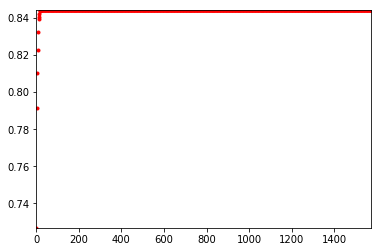

In [146]:
plt.plot( x,y, 'r.')
plt.xlim(np.min(x), np.max(x))
plt.ylim(np.min(y), np.max(y))

In [147]:
np.argmax(y)

10

In [210]:
x[np.argmax(y)]

21

In [149]:
np.max(y)

0.84400671742051059

In [150]:
np.min(y)

0.72685807583221373

## Classification using weighted tfidf_word2Vec

In [132]:
b=np.ndarray(shape=(1750,50),dtype=float)
for i, d in enumerate(X_train_tfidfw2v):
    b[i]=d

In [134]:
x_tf=[]
y_tf=[]
for k in range(1,1575,2):
    model=KNeighborsClassifier(n_neighbors=k,weights='distance',algorithm='kd_tree')
    avg_accuracy=np.mean(cross_val_score(model,b, y_train_avgw2v,cv=10, scoring='accuracy'))
    x_tf.append(k)
    y_tf.append(avg_accuracy)

(0.75, 0.86)

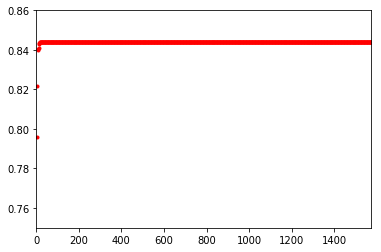

In [135]:
plt.plot( x_tf,y_tf, 'r.')
plt.xlim(np.min(x_tf), np.max(x_tf))
plt.ylim(np.min(y_tf), np.max(y_tf))

In [136]:
np.argmax(y_tf)

8

In [211]:
x_tf[np.argmax(y_tf)]

17

In [138]:
np.max(y_tf)

0.84400671742051059

In [139]:
np.min(y_tf)

0.74229403642334679

## Classification using BoW

In [ ]:
neighbors=[]
accuracy=[]
for k in range(1, 1574, 2):
    model=KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree', weights='distance')
    avg_accuracy_bow=np.mean(cross_val_score(model, bigrams_train, y_train_avgw2v,cv=10))
    neighbors.append(k)
    accuracy.append(avg_accuracy_bow)

(0.83037050306015825, 0.84400671742051059)

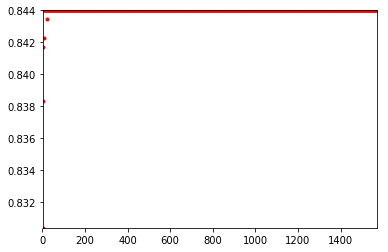

In [195]:
plt.plot( neighbors,accuracy, 'r.')
plt.xlim(np.min(neighbors), np.max(neighbors))
plt.ylim(np.min(accuracy), np.max(accuracy))

In [196]:
np.argmax(accuracy)

4

In [197]:
neighbors[np.argmax(accuracy)]

9

In [198]:
np.max(accuracy)

0.84400671742051059

In [199]:
np.min(accuracy)

0.83037050306015825

## Classification using TF-IDF - TSNE best performer

In [ ]:
neighbors_tf=[]
accuracy_tf=[]
for k in range(1, 1574, 2):
    model=KNeighborsClassifier(n_neighbors=k,algorithm='kd_tree', weights='distance',n_jobs=1)
    avg_accuracy_tf=np.mean(cross_val_score(model, bigrams_train_tf, y_train_avgw2v,cv=10,n_jobs=1))
    neighbors_tf.append(k)
    accuracy_tf.append(avg_accuracy_tf)

(0.79150264964920136, 0.85258811016569636)

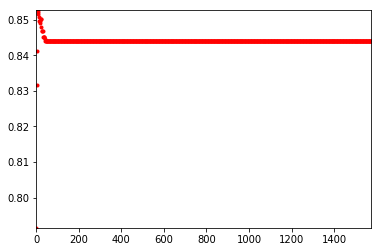

In [201]:
plt.plot( neighbors_tf,accuracy_tf, 'r.')
plt.xlim(np.min(neighbors_tf), np.max(neighbors_tf))
plt.ylim(np.min(accuracy_tf), np.max(accuracy_tf))

In [202]:
np.argmax(accuracy_tf)

3

In [203]:
neighbors_tf[np.argmax(accuracy_tf)]

7

In [204]:
np.max(accuracy_tf)

0.85258811016569636

## Tabulating the results

In [216]:
results=pd.DataFrame(columns=['vectorization_method', 
                             'max_accuracy_on_cross_validation_set', 'optimal_k'])

In [217]:
results=results.append(
    [
        {
            'vectorization_method' : 'bag_of_words',
            
            'max_accuracy_on_cross_validation_set' : 0.84,
            'optimal_k': 9
        },
        
        {
            'vectorization_method' : 'tf_idf',
            
            'max_accuracy_on_cross_validation_set' : 0.85,
            'optimal_k': 9
        },
        
        {
            'vectorization_method' : 'average_word2Vec',
            
            'max_accuracy_on_cross_validation_set' : 0.84,
            'optimal_k': 21
        },
        
        {
            'vectorization_method' : 'tf_idf_weighted_word2Vec',
            
            'max_accuracy_on_cross_validation_set' : 0.84,
            'optimal_k' : 17
        }
    ]
)

In [218]:
results

,vectorization_method,max_accuracy_on_cross_validation_set,optimal_k
0,bag_of_words,0.84,9
1,tf_idf,0.85,9
2,average_word2Vec,0.84,21
3,tf_idf_weighted_word2Vec,0.84,17


## test data

In [219]:
test_set_accuracy=[]

# bag_of_words
model_bow=KNeighborsClassifier(n_neighbors=int(results[results.vectorization_method=='bag_of_words'].optimal_k),
                              weights='distance', algorithm='brute')
model_bow.fit(bigrams_train, y_train_avgw2v)
test_set_accuracy.append(accuracy_score(y_test_avgw2v, model_bow.predict(bigrams_test)))

# tf_idf
model_tfidf=KNeighborsClassifier(n_neighbors=int(results[results.vectorization_method=='tf_idf'].optimal_k),
                              weights='distance', algorithm='brute')
model_tfidf.fit(bigrams_train_tf, y_train_tfidfw2v)
test_set_accuracy.append(accuracy_score(y_test_avgw2v ,model_tfidf.predict(bigrams_test_tf)))

# average_word2Vec
model_avg_word2Vec = KNeighborsClassifier(n_neighbors=int(results[results.vectorization_method=='average_word2Vec'].optimal_k),
                              weights='distance', algorithm='kd_tree')
model_avg_word2Vec.fit(X_train_avgw2v, y_train_avgw2v)
test_set_accuracy.append(accuracy_score(y_test_avgw2v ,model_avg_word2Vec.predict(X_test_avgw2v)))

# tfidf weighted word2Vec
model_tfidf_word2Vec = KNeighborsClassifier(n_neighbors=int(results[results.vectorization_method=='average_word2Vec'].optimal_k),
                              weights='distance', algorithm='kd_tree')
model_tfidf_word2Vec.fit(X_train_tfidfw2v, y_train_tfidfw2v)
test_set_accuracy.append(accuracy_score(y_test_tfidfw2v ,model_tfidf_word2Vec.predict(X_test_tfidfw2v)))

In [220]:
results['test_set_outcome']=test_set_accuracy

In [221]:
results

,vectorization_method,max_accuracy_on_cross_validation_set,optimal_k,test_set_outcome
0,bag_of_words,0.84,9,0.822667
1,tf_idf,0.85,9,0.836000
2,average_word2Vec,0.84,21,0.822667
3,tf_idf_weighted_word2Vec,0.84,17,0.822667


# Conclusion
TF-IDF produces the most accurate vector representations of text reviews